<font size ="8"> <div align="center">**Statistical Analysis**</div></font>
<font size ="5"> <div align="center">By **Jon Nyner Gavan**</div></font>

-----
# **Context of the Exercise (Medicon Vaccine Data)**
-----
<p align = "justify">
Medicon, a pharmaceutical company, has manufactured the sixth batch (40,000 units) of COVID-19 vaccine doses. <b> This vaccine was clinically tested last quarter and around 200,000 doses have already been given to people in five batches.</b>
<p align = "justify">
Now, the sixth batch of doses needs to be tested for their <b>time of effect</b> (measured as the <b>time taken for the dose to be absorbed in the body for its COVID-19 preventative effects</b>, such as antibody creation, to manifest), as well as for <b>quality assurance</b> (which tells you whether the dose will be able to do a satisfactory job or not).
<p align = "justify">
As part of the quality assurance team of Medicon, the goal is to use Statistical Analysis -  combining inferential and hypothesis testing concepts - to understand the quality of the sixth batch so that the company can plan for the next batch of doses.
<br>

-----
## **Problem Statement**
-----
<p align = "justify">
The previous analysis found that a dose is ten times more likely to produce a satisfactory
result than not.
<br>
<p align = "justify">
<b> Note: </b> Here, a satisfactory job for the vaccine means that the dose <b>has successfully prevented COVID-19</b> - which is assumed to have taken place if the person does not show any symptoms or side effects after 14 days have passed since the vaccine dose was administered.
<br>

**Question 1**<br><p align = "justify">
The quality assurance team has collected 100 volunteers who were ready for the trial of this new batch, and they have given one dose to each volunteer. Help the team answer the following questions:


> a) **Plot the probability distribution** for the number of unsatisfactory doses.

> b) What is the probability that **exactly 3 doses will not be able to do a satisfactory job**?

> c) What is the probability that **at most 3 doses will not do a satisfactory job** out of 100 selected?

<br>

**Question 2**<br><p align = "justify">
The New York city administration wants to buy 200 doses for Health care workers who were COVID-Positive. They have contacted the company and requested 200 doses. What is the probability that **at least 30 doses will not do a satisfactory job** out of 200 doses?

<br>

**Question 3**<br><p align = "justify">
The quality assurance team wants to analyze the **time of effect for doses**. So, they collected the 50 volunteers with the help of the city administration and gave one dose to each volunteer. Data for these 50 doses are in the 'doses.csv' file. Based on this sample, answer the following questions:

> a) What is the probability that the time of effect is **less than 11.5 hours**?

> b) What is the **90th percentile of time of effect for the doses**?

> c) For the effectiveness test of the vaccine, estimate the range in which **the population mean (time of effect) will lie with a 95% confidence level**.




### **Importing the necessary Libraries**

In [ ]:
# import the important libraries
import pandas as pd               # library used for data manipulation and analysis
import numpy as np                # library used for working with arrays
import matplotlib.pyplot as plt   # library for visualization
import seaborn as sns             # library for visualization
%matplotlib inline
import scipy.stats as stats       # this library contains a large number of probability
                                  # distributions as well as a growing library of statistical functions

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Solution to Question 1**

**Recall Problem Statement**<br>
<p align = "justify">
The quality assurance team has collected the 100 volunteers who were ready for the trial of this new batch and given one dose to each volunteer. What is the probability that k doses will do a satisfactory job out of 100 doses given to the volunteers?

---

<b> Preliminary Analysis </b>
<p align = "justify">
The above situation follows the Binomial distribution because we are taking a random sample of 100 doses and each dose either does a satisfactory job or doesn't.
<br>

First checking whether the assumptions of the binomial distribution are satisfied or not.

*  There are only two possible outcomes (success or failure) for each trial
> A dose will do a satisfactory job or not (yes or no).

* The number of trials (n) is fixed
> A  sample of size 100 is taken. Each dose in the sample represents a trial.

* Each trial is independent of the other trials
> It is reasonable to assume that giving a dose to each person is independent.

* The probability of success (p) is the same for each trial
> The probability of success for each trial (a dose will not do a satisfactory job) is not known.


<b>Finding the probability of success of each trial</b>
> i.e. a dose will not do a satisfactory job.

Let $p$ be the probability that a dose will not do a satisfactory job.

<p align = "justify">
As we already know, the quality assurance team checked on five batches of doses and found that - it is 10 times more likely that a dose will be able to produce a satisfactory result than not. So, the probability that a dose will do a satisfactory job is $10p$.

According to the rules of probability,

$p + 10p = 1$

$=> 11p = 1$

$=> p = 1/11$

$=> p = 0.09$

Hence, the probability of success for each trial (a dose will not do a satisfactory job) is **0.09**.

**Estimating the probability distribution of doses**

In [ ]:
# declare the sample size in variable n that represents the number of doses given to the volunteers
n=100

# declare p that represents the probability of success i.e. the probability that a dose will not do a satisfactory job
p=0.09

# declare the different number of doses selected in a Numpy array
k=np.arange(0,101)
k

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [ ]:
# import the binomial function from the scipy library
from scipy.stats import binom

# use the binom.pmf() function to generate the probability distribution
binomial = binom.pmf(k = k,n = n, p = p)

In [ ]:
binomial

array([8.01935118e-005, 7.93122644e-004, 3.88281470e-003, 1.25444783e-002,
       3.00860701e-002, 5.71304716e-002, 8.94625517e-002, 1.18815257e-001,
       1.36604904e-001, 1.38106057e-001, 1.24295451e-001, 1.00578737e-001,
       7.37761613e-002, 4.93919862e-002, 3.03562992e-002, 1.72130224e-002,
       9.04393005e-003, 4.41965812e-003, 2.01555838e-003, 8.60313523e-004,
       3.44598109e-004, 1.29832882e-004, 4.61094802e-005, 1.54652915e-005,
       4.90725596e-006, 1.47541234e-006, 4.20922794e-007, 1.14096288e-007,
       2.94196474e-008, 7.22392251e-009, 1.69087417e-009, 3.77614579e-010,
       8.05283837e-011, 1.64113789e-011, 3.19846848e-012, 5.96511861e-013,
       1.06519975e-013, 1.82226034e-014, 2.98791675e-015, 4.69782347e-016,
       7.08545353e-017, 1.02550118e-017, 1.42475439e-018, 1.90064347e-019,
       2.43514011e-020, 2.99709552e-021, 3.54410483e-022, 4.02720353e-023,
       4.39783902e-024, 4.61580772e-025, 4.65638625e-026, 4.51491879e-027,
       4.20769059e-028, 3

* <p align = "justify"> It is seen that the <b>binomial</b> variable is the array of probabilities for the different number of doses that will not do a satisfactory job. Let us visualize the same in the following plot.

**a) Plot the  Probability Distribution**

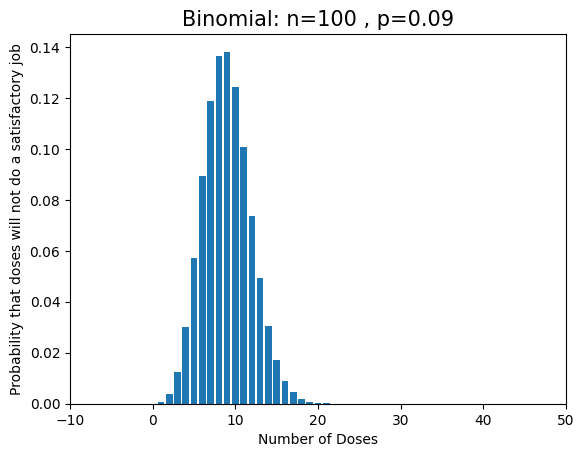

In [ ]:
# plot the distribution
plt.bar(k,binomial)
plt.xlim(-10,50)
plt.title('Binomial: n=%i , p=%.2f' % (n,p), fontsize=15)
plt.xlabel('Number of Doses')
plt.ylabel('Probability that doses will not do a satisfactory job')
plt.show()

**b) What is the probability that exactly 3 doses will not be able to do a satisfactory job?**

In [ ]:
binomial[3]

np.float64(0.012544478265088926)

* The probability of exactly 3 doses will not do a satisfactory job is **0.0125** i.e. 1.25%.

**c) What is the probability that at most 3 doses will not do the satisfactory job out of 10 selected?**

First, we need to calculate $P(X<=3)$.
> Here, $X$ is the random variable that represents the number of doses that will not do a satisfactory job.

CDF is used to calculate the cumulative probability.

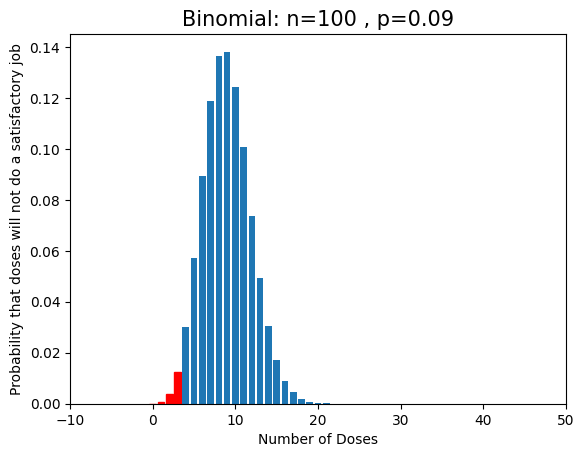

In [ ]:
# plot the probability distribution
# we are plotting the distributions here to better visualize the calculations
# ofcourse you do not 'need' to create the following visualization to answer the question above
# you can directly use the cdf function for probability calculations
barl=plt.bar(k,binomial)
plt.xlim(-10,50)
plt.title('Binomial: n=%i , p=%.2f' % (n,p), fontsize=15)
plt.xlabel('Number of Doses')
plt.ylabel('Probability that doses will not do a satisfactory job')
for i in range(0,4):
    barl[i].set_color('r')
plt.show()

* In the above graph, the red region represents $P(X<=3)$.


**Calculating the probability that out of 100 randomly selected doses, at most 3 will not do a satisfactory job**

In [ ]:
# Calculate the cdf
from scipy.stats import binom
prob_atmost3 = binom.cdf(k = 3 ,n = n, p = p)
print(prob_atmost3)

0.017300609121718068


* The probability of at most 3 doses will not do a satisfactory job is **1.73%**

### **Solution to Question 2**

**Recall Problem Statement**
<p align = "justify">
The New York city administration wants to buy 200 Doses for Health care workers who were COVID-Positive. They have contacted the company and requested 200 Doses. What is the probability that at least 30 doses will not do a satisfactory job out of 200 doses?

---
**Approach**

To calculate using python libraries, the probability that at least 30 doses will not do a satisfactory job out of 200 selected. $P(X>=30)$
> where $X$ is the random variable that represents doses that will not do a satisfactory job.



In [ ]:
# declare the sample size in variable n which represents the number of doses selected randomly
n = 200

# declare p which represents the probability of success, i.e., the probability that a dose will not do a satisfactory job
p = 0.09

# declare the different number of doses selected in a Numpy array
k = np.arange(0,201)
k

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
# import the required function
from scipy.stats import binom

# use the binom.pmf() function to generate the probability distribution
binomial = binom.pmf(k = k,n = n, p = p)

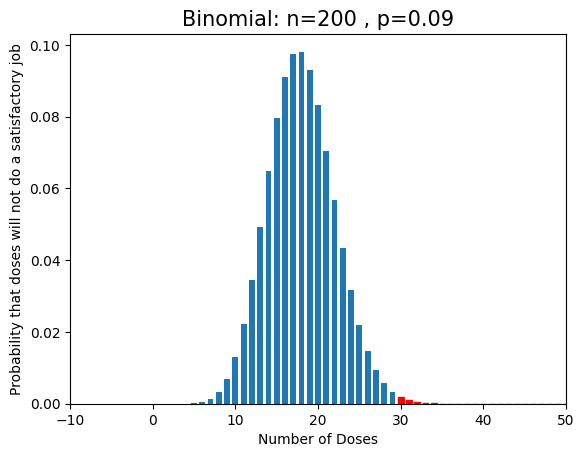

In [ ]:
# plotting the probability distribution

barl=plt.bar(k,binomial,width=0.7)
plt.xlim(-10,50)
plt.title('Binomial: n=%i , p=%.2f' % (n,p), fontsize=15)
plt.xlabel('Number of Doses')
plt.ylabel('Probability that doses will not do a satisfactory job')
for i in range(30,201):
    barl[i].set_color('r')
plt.show()

* In the above graph, the red region represents $P(X>=30)$.



**Calculating the probability that out of 200 randomly selected doses, at least 30 will not do a satisfactory job**

> We will use binom.cdf() for this because $P(X>=30) = 1 - P(X<30)$

In [ ]:
# calculate cdf
prob_atleast30 = 1-binom.cdf(k = 29 , n = 200, p = 0.09)
print(prob_atleast30)

0.003963863923503452


* The probability of at least 30 doses will not do a satisfactory job is **0.003** i.e. ~0.3%.

### **Question 3 Solution**

**Recall Poblem Statement**
<p align = "justify">
The quality assurance team wants to analyze the time of effect for doses. So, they have collected the 50 volunteers with the help of the city administration and given one dose to each volunteer. Data of these 50 doses are in the 'doses.csv' file.

---
**Description of the Data**:

We are using the dataset which is randomly generated and have two features

1. **drug_serial_number**: It represents the serial number of each dose and is discrete in nature

2. **time of effect**: It is measured as the **time taken for the dose to be absorbed in the body for its COVID-19 preventative effects**, such as antibody creation, to manifest. It is in hours and continuous in nature.

**Loading the dataset and taking a quick look**

In [ ]:
path = '/content/drive/MyDrive/Classroom/Data Science/MIT Summer School/2 Foundations of Data Science/2 Statistics for Data Science/2 Mentored Learning Session/Dataset 1 Medicon Dose Testing.csv'
drug = pd.read_csv(path)
drug.head()

,drug_serial_number,time_of_effect
0,672,5.8
1,895,17.3
2,518,16.7
3,448,13.1
4,402,13.6


**Getting an overview of the dataset**

In [ ]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   drug_serial_number  50 non-null     int64  
 1   time_of_effect      50 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 932.0 bytes


* As you can see from the result of the info function, there are **no null values** present in any of the columns.

**Calculating the mean and standard deviation of the time of effect for the sample doses**

In [ ]:
# import the required function
from scipy.stats import norm
# estimate the mean and standard deviation of the time of effect for the doses
mu = drug['time_of_effect'].mean()
sigma = drug['time_of_effect'].std()
print('The estimated mean is', round(mu,2))
print('The estimated standard deviation is', round(sigma,2))

The estimated mean is 13.44
The estimated standard deviation is 4.75


**Plotting the Distribution**

> It will help us analyze the shape of the distribution of time of effect for doses.

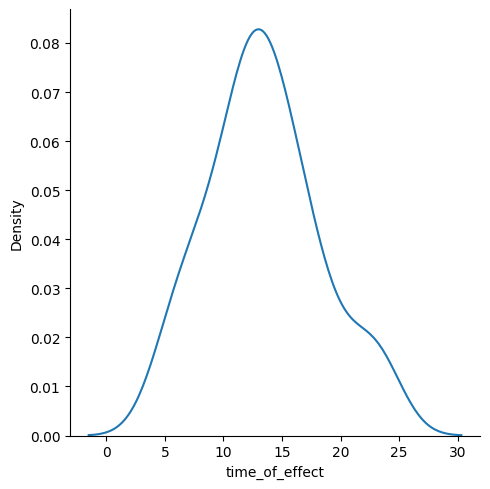

In [ ]:
# Plotting the Distribution curve
sns.displot(drug['time_of_effect'],kind="kde")

* <p align = "justify"> We can see in the above plot, that the shape of the distribution is not perfectly normal because we have just 50 observations in the sample. But, we can assume this data distribution to be normal and perform our calculations based on the normality assumption.

**a) What is the probability that the time of effect is less than 11.5 hours?**

In [ ]:
# find the cumulative probability
# norm.cdf() calculates the cumulative probability
prob = norm.cdf(11.5, mu, sigma)
print('The probability that a dose will take less than 11.5 hours is', round(prob, 4))

The probability that a dose will take less than 11.5 hours is 0.3412


**b) What is the 90th percentile of the time of effect for doses?**

In [ ]:
perc_90th = norm.ppf(0.90, mu, sigma)
print('The 90th percentile of the time of effect for doses is', round(perc_90th, 2))

The 90th percentile of the time of effect for doses is 19.52


<p align = "justify">
<b>c) For the effectiveness test of the
vaccine, estimate the range in which the population mean (effective time) will lie with a 95% confidence level.</b>

> <p align = "justify"> The population standard deviation is not known here. Therefore, we will calculate the confidence interval using the t-distribution.

In [ ]:
# import the required function
# use t distribution whenever population standard deviation is unknown (only sample sd is given)
from scipy.stats import t

# set the values of the sample mean and sample standard deviation
x_bar, s = mu, sigma

# set the value of sample size and degrees of freedom
n = 50
k = n - 1

# construct the confidence interval
np.round(t.interval(0.95, df = k, loc = x_bar, scale = s/np.sqrt(n)), 2)

array([12.09, 14.79])

* **95% of the time**, the mean effective time of doses will be between **12.09 hours and 14.79 hours.**

### **Summary and Conclusions**
* This project took a close look at the Medicon dataset concerning COVID-19 vaccine doses.
* By using statistical analysis tools such as inferential statistics and different hypothesis testing methods, the quality of the supposed 6th batch of doses were evaluated
* Three case scenarios were considered wherein probabilities of several events were calculated:

> **Scenario 1:**
  * For a sample size of 100 Volunteer, the probability that 3 doses will not be able to do well was found to be 1.25%
  * On the other hand, the probability that at most 3 doses will fail was 1.73%

> **Scenario 2:**
  * Taking the case of New York City Administrations 200 Doses sample, it was found that the probability of at least 30 out of these 200 will fail was calculated to be 0.3%

> **Scenario 3:**
  * Looking at the 'dose time of effect' data obtained from 50 volunteers, it was found that the probability of the doses to take effect in less than 11.5 hours was 34.12%
  * The 90th percentile of the 'time of effect' was 19.52 hrs
  * With a 95% confidence, the mean effective time of dose was calculated between 12.09 and 14.79 hours